# Wine Quality Prediction Project 

#### By using machine learning for wine quality prediction enhances operational efficiency, provides objective information to consumers, and supports decision-making in the wine industry. In this project I am using the wine quality dataset available on Kaggle for free.

#### https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download&select=WineQT.csv


## Objective

#### Predict whether a wine is of good or bad quality based on factors such as chemical composition and other relevant attributes.

#### The main idea is to predict wine quality by applying a XGBoost model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import SMOTE



from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

import joblib

In [3]:
df = pd.read_csv('WineQT.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
# type of data present in each of the columns present in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB



#### Dataset consists of 1143 rows and 13 columns. Data type of almost variable are float

In [5]:
#descriptive statistical measures of the dataset.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


# Data Processing

In [6]:
# df['quality'] = df.quality.apply(lambda x:2 if x>6 else 0 if x<=5 else 1 )
df['quality'] = df.quality.apply(lambda x:1 if x>6 else 0 )


In [7]:
df['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

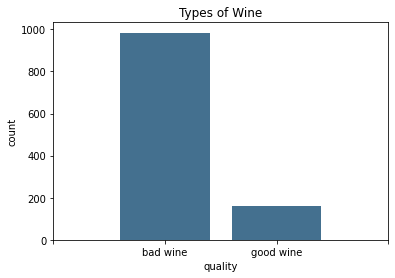

In [8]:
# Plot quality classification 
      
df['quality'].value_counts()
      
plt.figure(num=None)
sb.countplot(data = df, x = 'quality', saturation=0.5)
plt.title("Types of Wine")
plt.xticks([-1,0,1,2], ['','bad wine','good wine', ''])
plt.show()

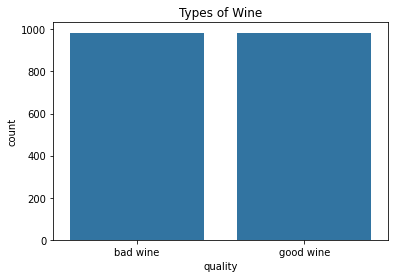

In [9]:

# Define features and target
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

# Apply SMOTE
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)

# Plot the results
sb.countplot(x=y_ros)
plt.xticks([0, 1], ['bad wine', 'good wine'])
plt.title("Types of Wine")
plt.show()


In [10]:
# split dataset to train and test variable 
# use test size of 20% of the data proportion
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((1574, 11), (394, 11))

In [11]:
# scale with StandardScaler
scaler = StandardScaler()

# fit to data training
scaler.fit(X_train)

# transform
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## XGBoost model

In [12]:
# Data processing and Model training for Random Forest

model_xgb = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
# Fit the model
model_xgb.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5)

# Calculate predictions
train_preds = model_xgb.predict(X_train)
val_preds = model_xgb.predict(X_test)

# Print cross-validation scores
print('Cross-Validation Scores:')
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score:.4f}')
print(f'Mean CV Score: {cv_scores.mean():.4f}\n')

# Print training and validation accuracies
print('XGBoost:')
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds):.4f}')
print()

Cross-Validation Scores:
Fold 1: 0.9651
Fold 2: 0.9175
Fold 3: 0.9206
Fold 4: 0.9175
Fold 5: 0.9363
Mean CV Score: 0.9314

XGBoost:
Training Accuracy: 1.0000
Validation Accuracy: 0.9569



In [13]:
# Validation

y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 95.69%


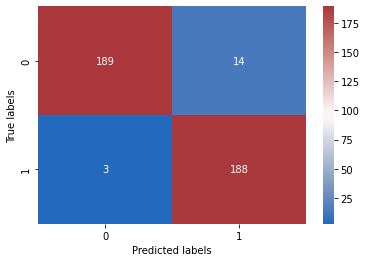

In [14]:
# Visualizing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [15]:
# Print the classification report for the best performing model.

print(metrics.classification_report(y_test,model_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       203
           1       0.93      0.98      0.96       191

    accuracy                           0.96       394
   macro avg       0.96      0.96      0.96       394
weighted avg       0.96      0.96      0.96       394



#### This suggests that the model has decent performance, but there might be some overfitting, as the training accuracy is higher than the validation accuracy.

#### The training accuracy of 1.0000 suggests that your model is overfitting to the training data.

#### Grid search

In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Define a smaller parameter grid to search
param_grid = {
    'reg_alpha': [0, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10],
    'learning_rate': [0.5, 0.2, 0.1, 0.05, 0.001, 0.0001],
    'max_depth': [None, 1, 3, 5, 7]
}

# Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_child_weight=1, random_state=42),
grid_search = GridSearchCV(estimator=XGBClassifier(n_estimators=100, min_child_weight=1, random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Utilize the best parameters to train the model
best_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1,
                            reg_alpha=grid_search.best_params_['reg_alpha'], reg_lambda=grid_search.best_params_['reg_lambda'])

# Fit the best model
best_model.fit(X_train, y_train)

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Calculate predictions
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_test)

# Print cross-validation scores
print('Cross-Validation Scores:')
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i}: {score:.4f}')
print(f'Mean CV Score: {cv_scores.mean():.4f}\n')

# Print training and validation accuracies
print('XGBoost:')
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds):.4f}')
print()

# Print the best model
print("Best XGBoost model:")
print(best_model)


Cross-Validation Scores:
Fold 1: 0.9270
Fold 2: 0.9016
Fold 3: 0.8984
Fold 4: 0.8952
Fold 5: 0.8885
Mean CV Score: 0.9022

XGBoost:
Training Accuracy: 0.9517
Validation Accuracy: 0.9289

Best XGBoost model:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [19]:
# Save the model
# Joblib

joblib.dump(best_model, 'XGBoost_joblib.pkl')

['XGBoost_joblib.pkl']